In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.utils import shuffle

# Load your dataset
df = pd.read_csv('PAT_Dataset.csv')

# Shuffle the dataset
df = shuffle(df, random_state=42)

# Columns containing the target variables
target_columns = [
    'steady_state_temp_L0', 'steady_state_temp_L1', 'router_avg_temp_L0', 'router_avg_temp_L1',
    'core_avg_temp_L0', 'core_avg_temp_L1', 'mem_avg_temp_L0', 'mem_avg_temp_L1',
    'total_area', 'avg_power', 'avg_cores_power', 'avg_routers_power', 'avg_power_per_router',
    'layer_area', 'area_per_core'
]

# Identify categorical columns
categorical_columns = ['routing_type', 'selection_strategy', 'traffic_type']

# One-hot encode categorical columns
X = pd.get_dummies(df.drop(columns=target_columns), columns=categorical_columns, drop_first=True)
y = df[target_columns]

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize StandardScaler
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Scale the feature and target data
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)


In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize and train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train_scaled)

# Evaluate the model
y_pred = linear_model.predict(X_test_scaled)
print("Linear Regression Performance:")
print("MSE:", mean_squared_error(y_test_scaled, y_pred))
print("MAE:", mean_absolute_error(y_test_scaled, y_pred))
print("R²:", r2_score(y_test_scaled, y_pred))


Linear Regression Performance:
MSE: 0.43985278942696937
MAE: 0.3840582395753557
R²: 0.5624827691772128


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize and train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train_scaled)

# Evaluate the model for each target column separately
for i, target in enumerate(target_columns):
    y_pred = linear_model.predict(X_test_scaled)[:, i]  # Get predictions for the current target
    print(f"Linear Regression Performance for {target}:")
    print("MSE:", mean_squared_error(y_test_scaled[:, i], y_pred))
    print("MAE:", mean_absolute_error(y_test_scaled[:, i], y_pred))
    print("R²:", r2_score(y_test_scaled[:, i], y_pred))
    print("-" * 30)


Linear Regression Performance for steady_state_temp_L0:
MSE: 0.4100359882120979
MAE: 0.48483181190614477
R²: 0.573090175987384
------------------------------
Linear Regression Performance for steady_state_temp_L1:
MSE: 0.41226228218240873
MAE: 0.48618949094499236
R²: 0.5709371726789143
------------------------------
Linear Regression Performance for router_avg_temp_L0:
MSE: 0.5869898079121901
MAE: 0.44149588652230054
R²: 0.4112380087142562
------------------------------
Linear Regression Performance for router_avg_temp_L1:
MSE: 0.9079909517692419
MAE: 0.557902460318498
R²: 0.13402088187566108
------------------------------
Linear Regression Performance for core_avg_temp_L0:
MSE: 0.6069506397570446
MAE: 0.49699857667461744
R²: 0.3838837537727766
------------------------------
Linear Regression Performance for core_avg_temp_L1:
MSE: 0.9037350854448459
MAE: 0.5864675156198313
R²: 0.10717303961240654
------------------------------
Linear Regression Performance for mem_avg_temp_L0:
MSE: 0.8

In [ ]:
# Example new input data as a DataFrame (ensure it matches the structure of the features)
new_data = pd.DataFrame({
    'dimx': [3],
    'dimy': [10],
    'dimz': [2],
    'buffer_size': [8],
    'packet_size_min': [4],
    'packet_size_max': [8],
    'routing_type_fullyadaptive': [1],    # Make sure to align with the encoded columns
    'selection_strategy_thermal': [1],
    'traffic_type_random': [1],
    'injection_rate': [0.06]
})

# Align new data columns to match X_train (fill missing columns with 0)
new_data_encoded = new_data.reindex(columns=X.columns, fill_value=0)

# Scale new data using the scaler fitted on training data
new_data_scaled = scaler_X.transform(new_data_encoded)

# Predict using the trained model
new_pred_scaled = linear_model.predict(new_data_scaled)

# Inverse transform the prediction to original scale
new_pred_orig = scaler_y.inverse_transform(new_pred_scaled)

# Display the prediction
print("Linear Regression Prediction on New Data:")
print(pd.DataFrame(new_pred_orig, columns=target_columns))


Decision Tree Prediction on New Data:
   steady_state_temp_L0  steady_state_temp_L1  router_avg_temp_L0  \
0             64.842565             63.960623           26.162374   

   router_avg_temp_L1  core_avg_temp_L0  core_avg_temp_L1  mem_avg_temp_L0  \
0           26.806416          25.88578         25.923201        25.659118   

   mem_avg_temp_L1    total_area     avg_power  avg_cores_power  \
0        25.712157  1.870657e+08  8.323909e-08     7.687921e-08   

   avg_routers_power  avg_power_per_router    layer_area  area_per_core  
0       6.707268e-09          2.108727e-10  9.353285e+07      4695230.0  


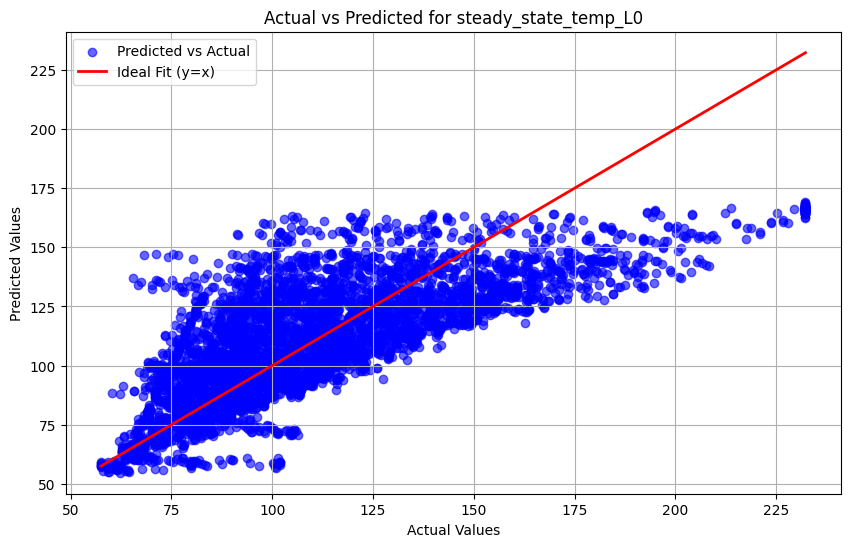

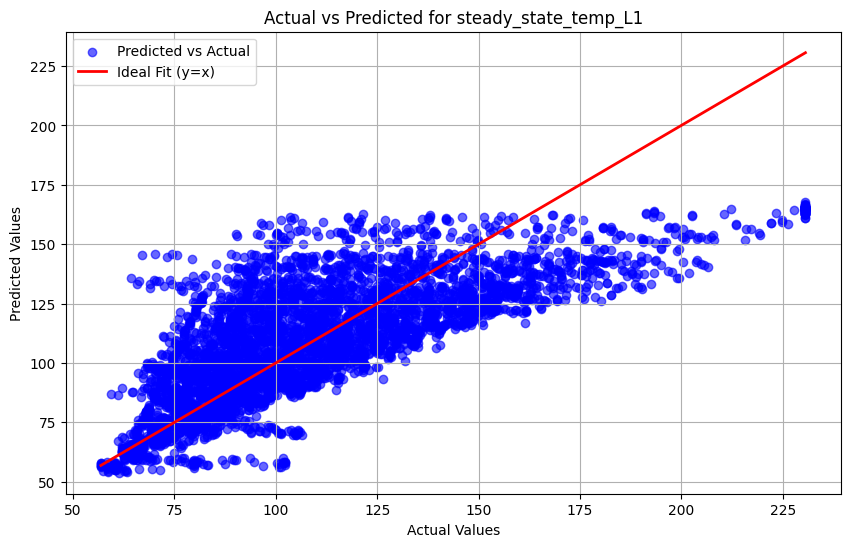

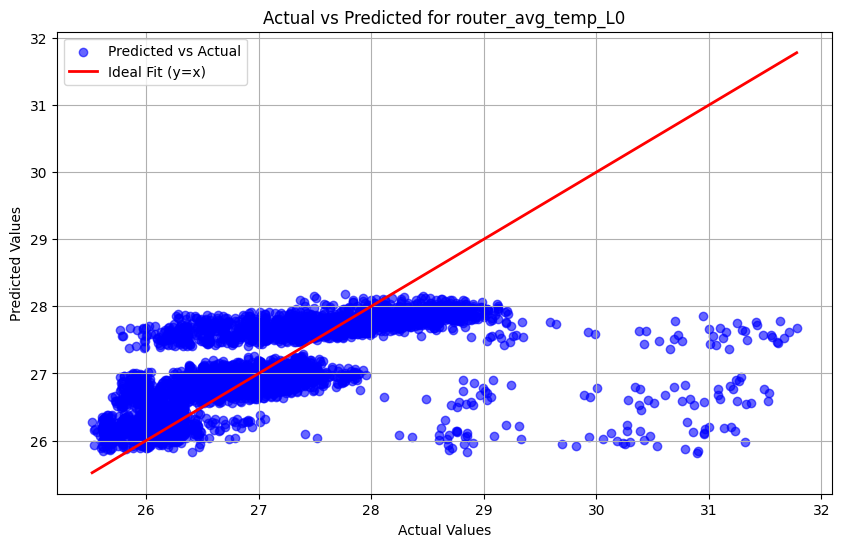

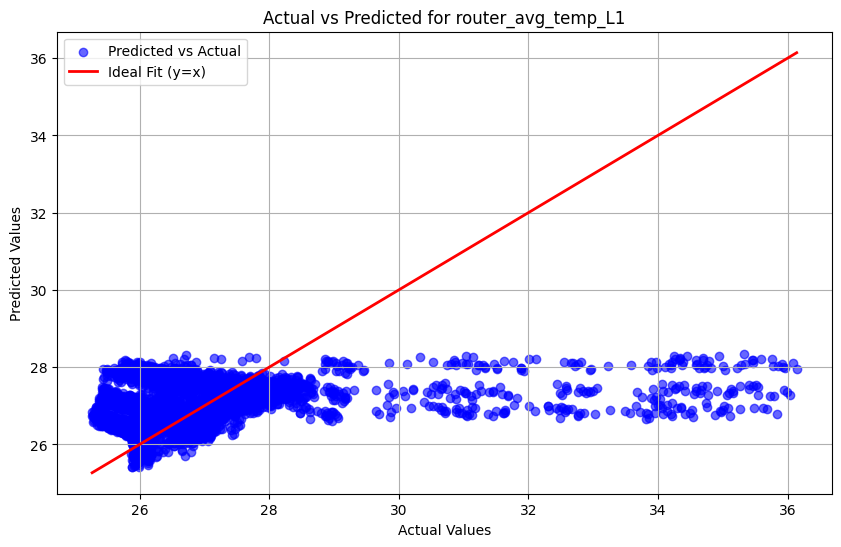

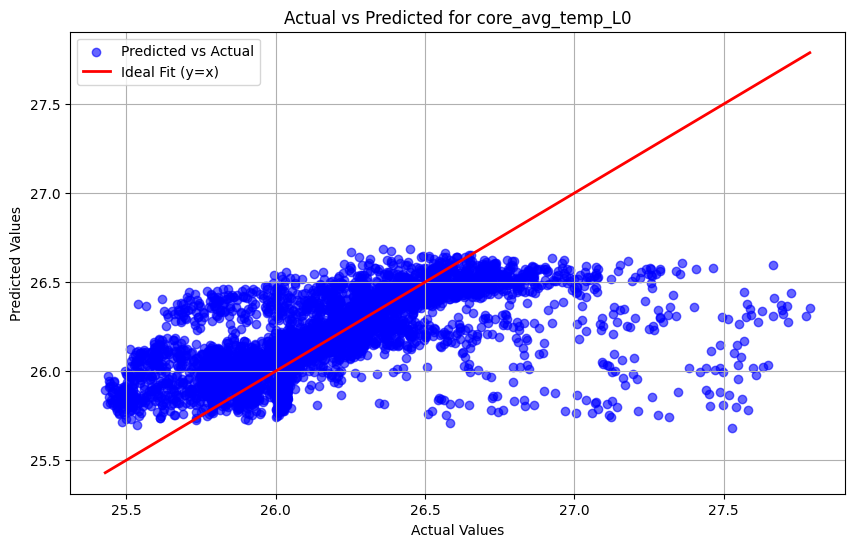

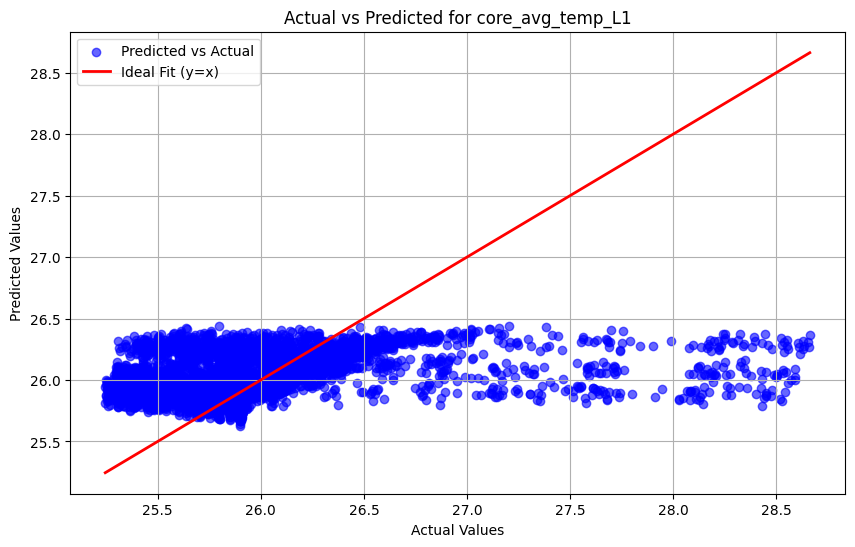

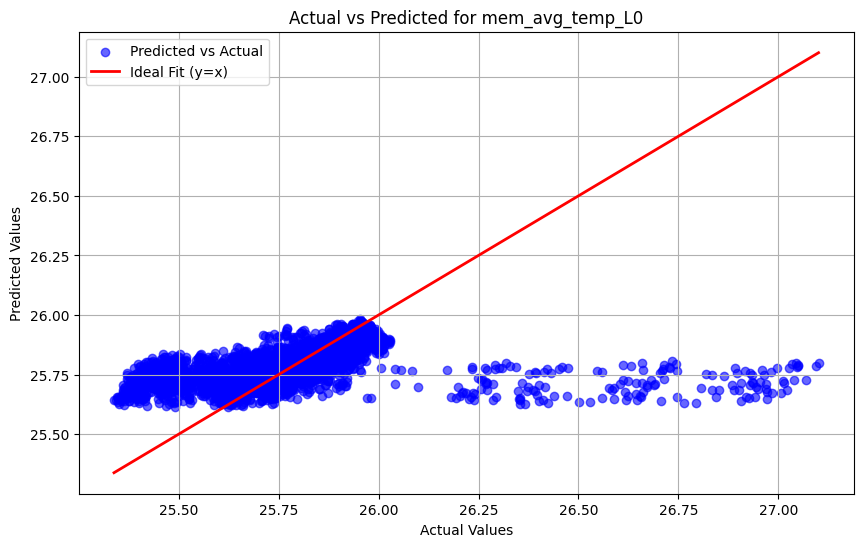

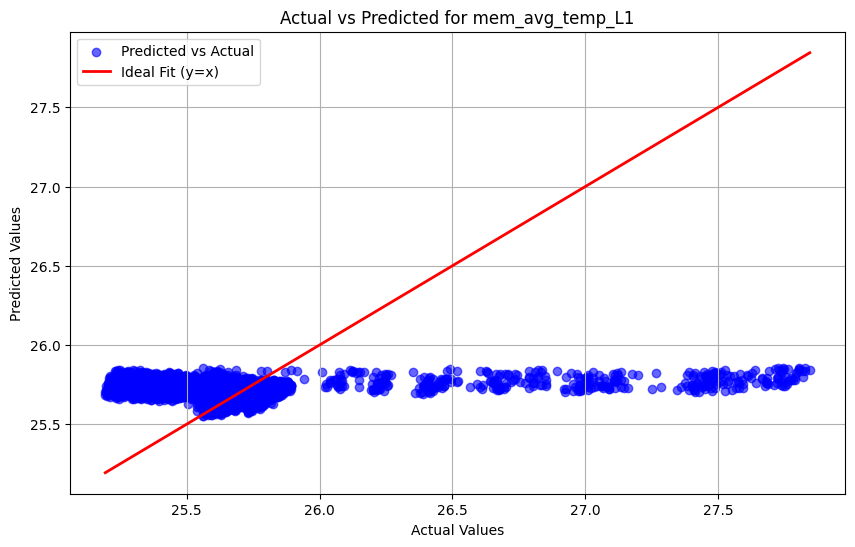

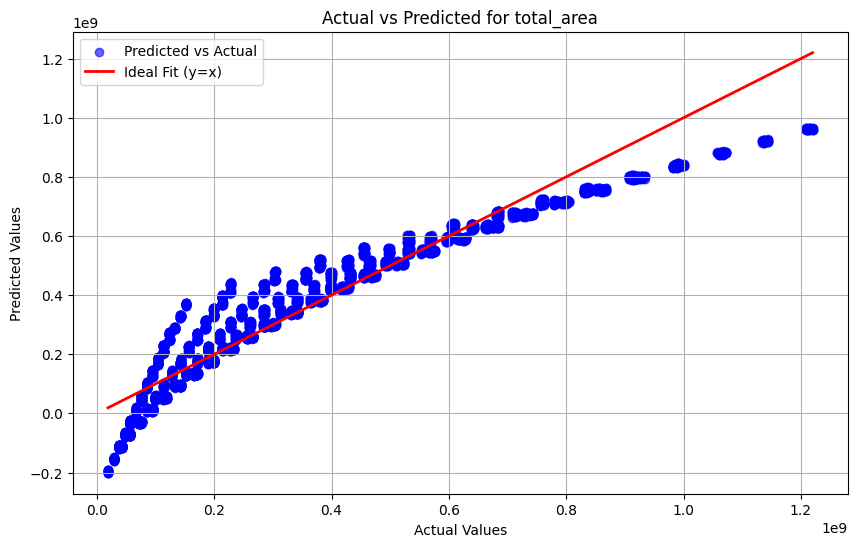

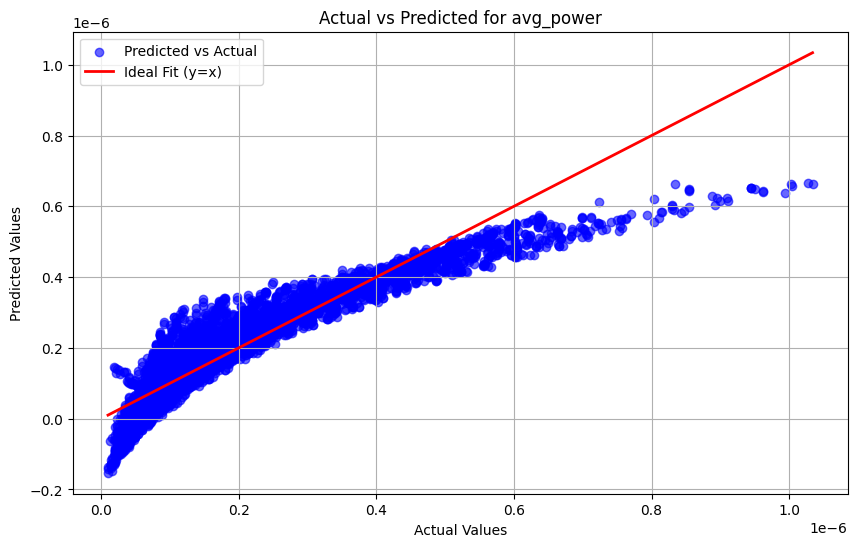

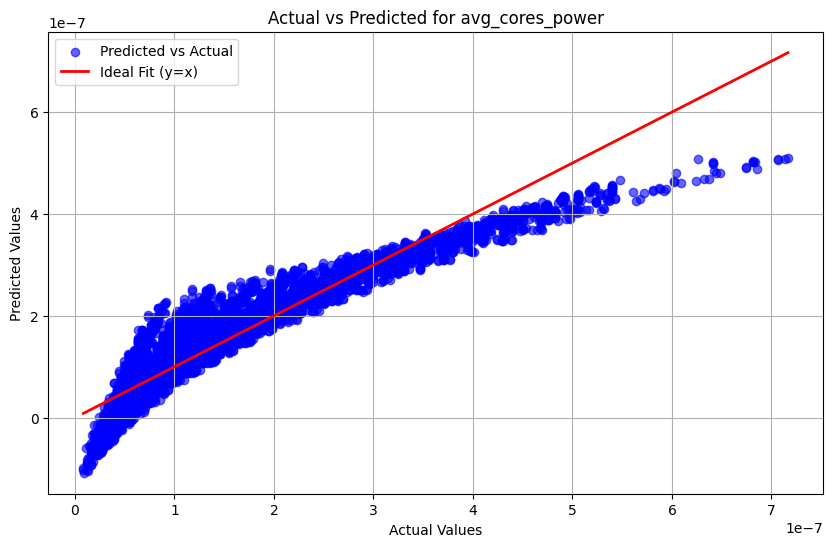

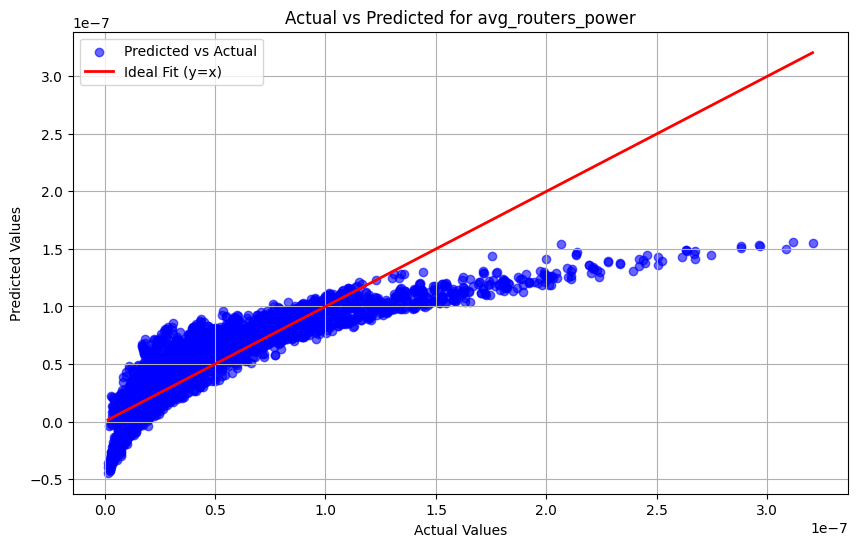

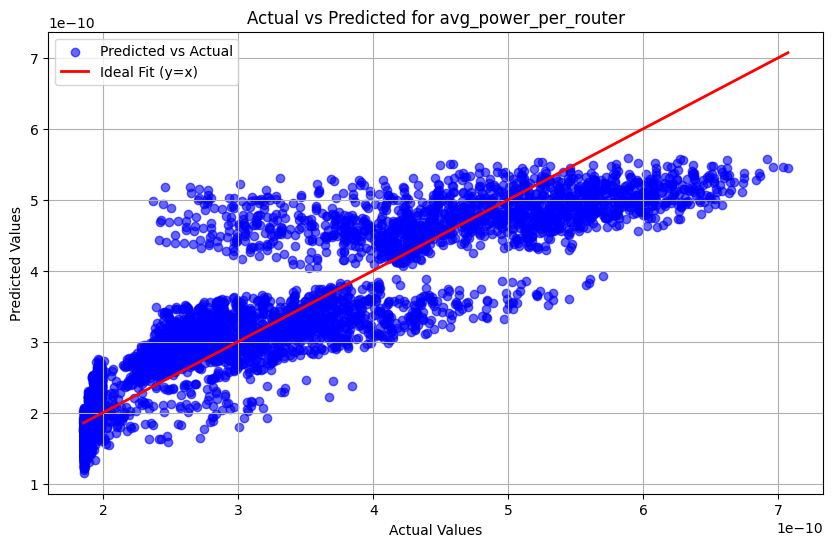

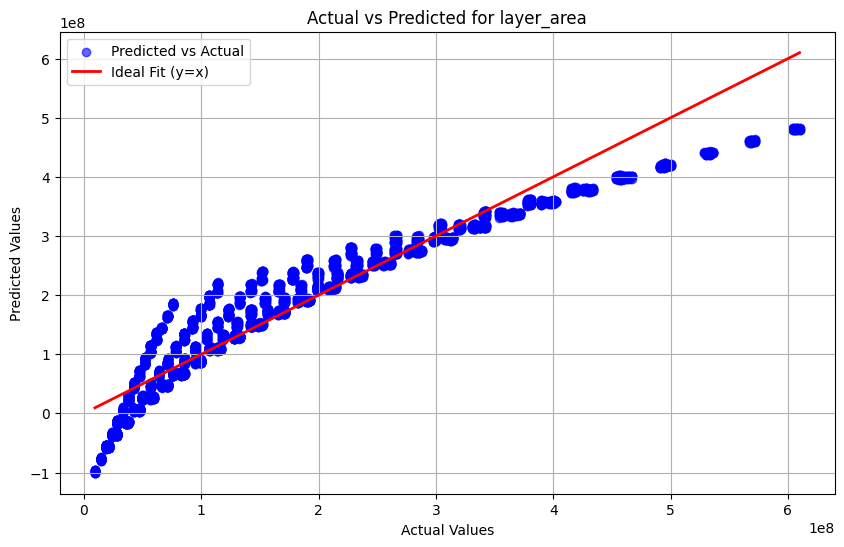

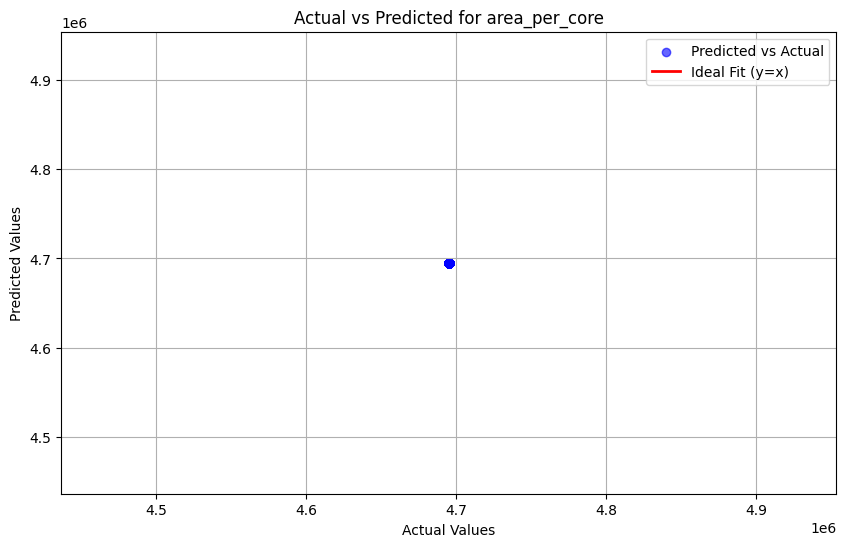

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_predictions_vs_actual(model, X_test_scaled, y_test_scaled, target_columns, scaler_y):
    """
    This function plots the actual vs predicted values for each target variable.

    Parameters:
    - model: Trained model (e.g., LinearRegression)
    - X_test_scaled: Scaled test features
    - y_test_scaled: Scaled test target values
    - target_columns: List of target column names
    - scaler_y: Fitted StandardScaler for target variables

    Returns:
    - None
    """
    # Inverse transform the scaled predictions and actual values
    y_test_inv = scaler_y.inverse_transform(y_test_scaled)
    y_pred_inv = scaler_y.inverse_transform(model.predict(X_test_scaled))

    # Loop through each target column and plot
    for i, target in enumerate(target_columns):
        # Get the actual and predicted values for the current target
        actual = y_test_inv[:, i]
        predicted = y_pred_inv[:, i]

        # Plotting
        plt.figure(figsize=(10, 6))
        plt.scatter(actual, predicted, color='blue', alpha=0.6, label='Predicted vs Actual')
        plt.plot([min(actual), max(actual)], [min(actual), max(actual)], color='red', linewidth=2, label='Ideal Fit (y=x)')
        plt.title(f'Actual vs Predicted for {target}')
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.legend()
        plt.grid(True)
        plt.show()

plot_predictions_vs_actual(linear_model, X_test_scaled, y_test_scaled, target_columns, scaler_y)


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train Decision Tree model
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train_scaled, y_train_scaled)

# Evaluate the model
y_pred = tree_model.predict(X_test_scaled)
print("Decision Tree Regression Performance:")
print("MSE:", mean_squared_error(y_test_scaled, y_pred))
print("MAE:", mean_absolute_error(y_test_scaled, y_pred))
print("R²:", r2_score(y_test_scaled, y_pred))


Decision Tree Regression Performance:
MSE: 0.004253354779621739
MAE: 0.023382228677129392
R²: 0.9958181291835907


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize and train Decision Tree model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train_scaled, y_train_scaled)

# Evaluate the model for each target column separately
for i, target in enumerate(target_columns):
    y_pred = tree_model.predict(X_test_scaled)[:, i]  # Get predictions for the current target
    print(f"Decision Tree Performance for {target}:")
    print("MSE:", mean_squared_error(y_test_scaled[:, i], y_pred))
    print("MAE:", mean_absolute_error(y_test_scaled[:, i], y_pred))
    print("R²:", r2_score(y_test_scaled[:, i], y_pred))
    print("-" * 30)


Decision Tree Performance for steady_state_temp_L0:
MSE: 0.0020795234782088165
MAE: 0.017092560381242895
R²: 0.9978348997950565
------------------------------
Decision Tree Performance for steady_state_temp_L1:
MSE: 0.0020361605906159025
MAE: 0.0169126439232484
R²: 0.9978808616319091
------------------------------
Decision Tree Performance for router_avg_temp_L0:
MSE: 0.007479429675649585
MAE: 0.041305811188437236
R²: 0.992497989147069
------------------------------
Decision Tree Performance for router_avg_temp_L1:
MSE: 0.003346533383933048
MAE: 0.02437509451439336
R²: 0.9968083073703046
------------------------------
Decision Tree Performance for core_avg_temp_L0:
MSE: 0.010618344213972479
MAE: 0.05059078481353526
R²: 0.9892213073852595
------------------------------
Decision Tree Performance for core_avg_temp_L1:
MSE: 0.004260365235050389
MAE: 0.03066103382230016
R²: 0.9957910575740471
------------------------------
Decision Tree Performance for mem_avg_temp_L0:
MSE: 0.00823623176246

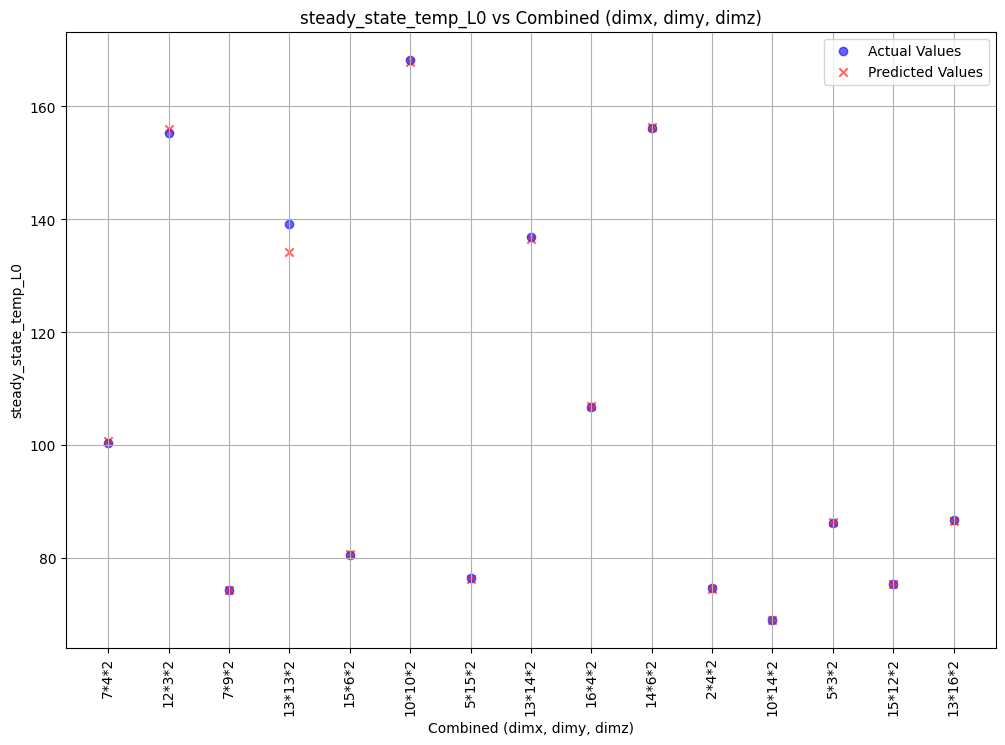

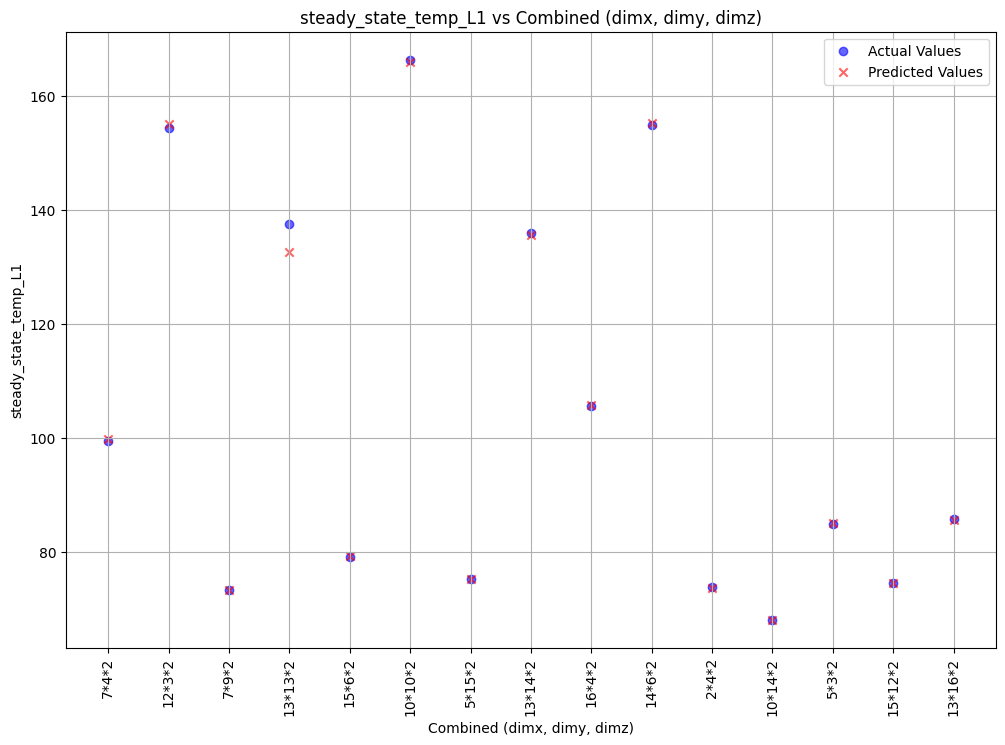

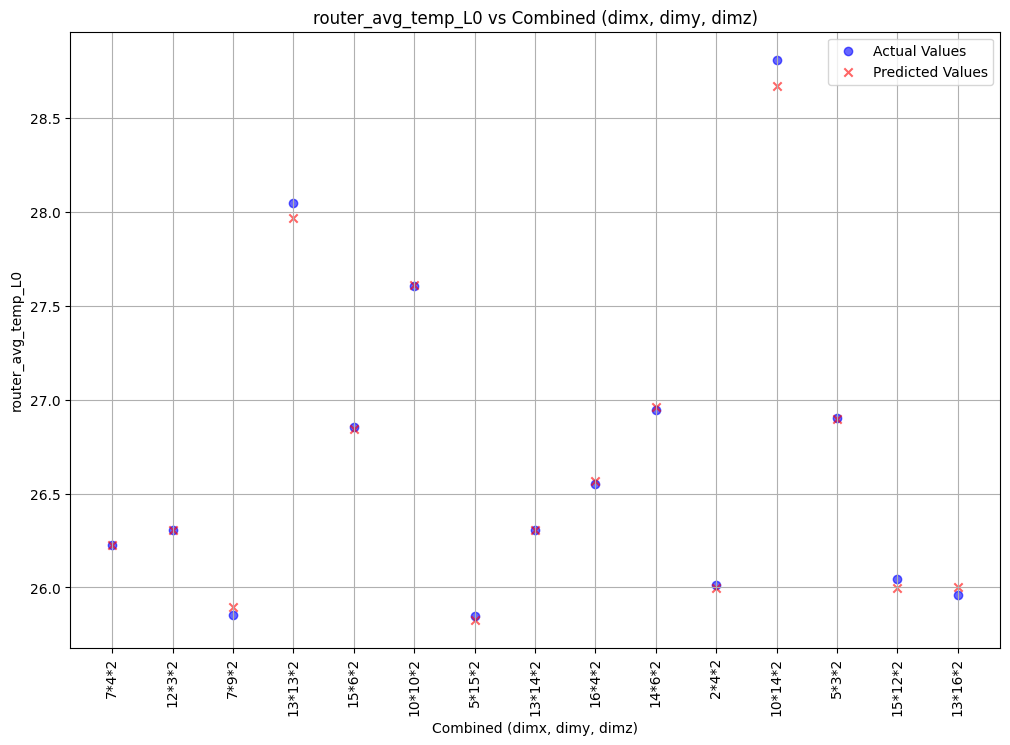

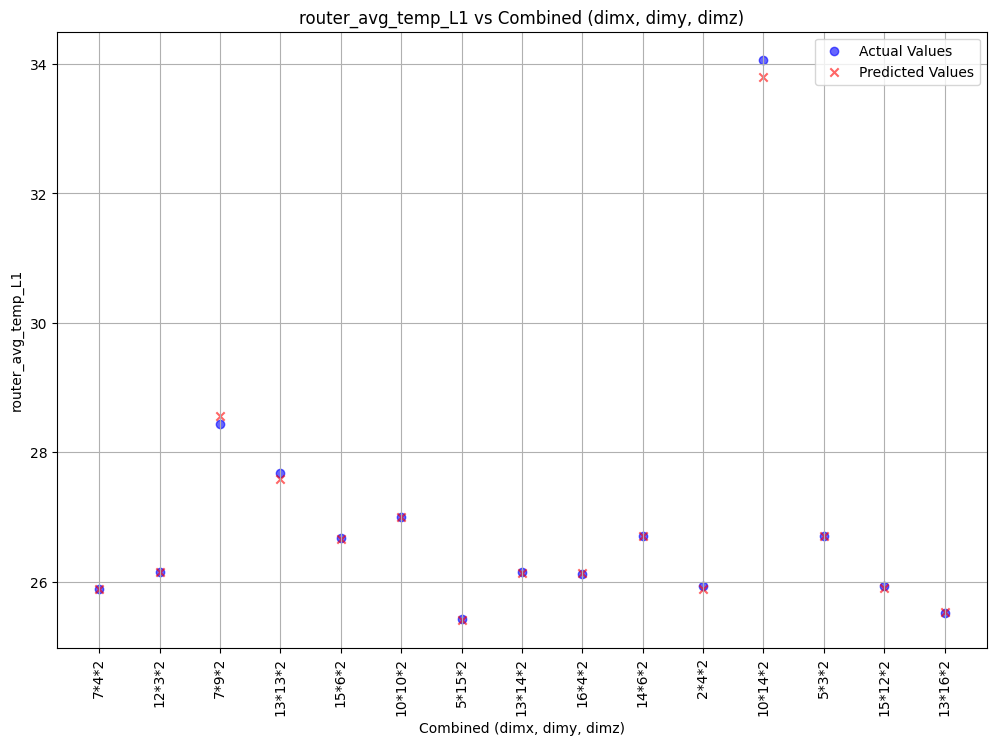

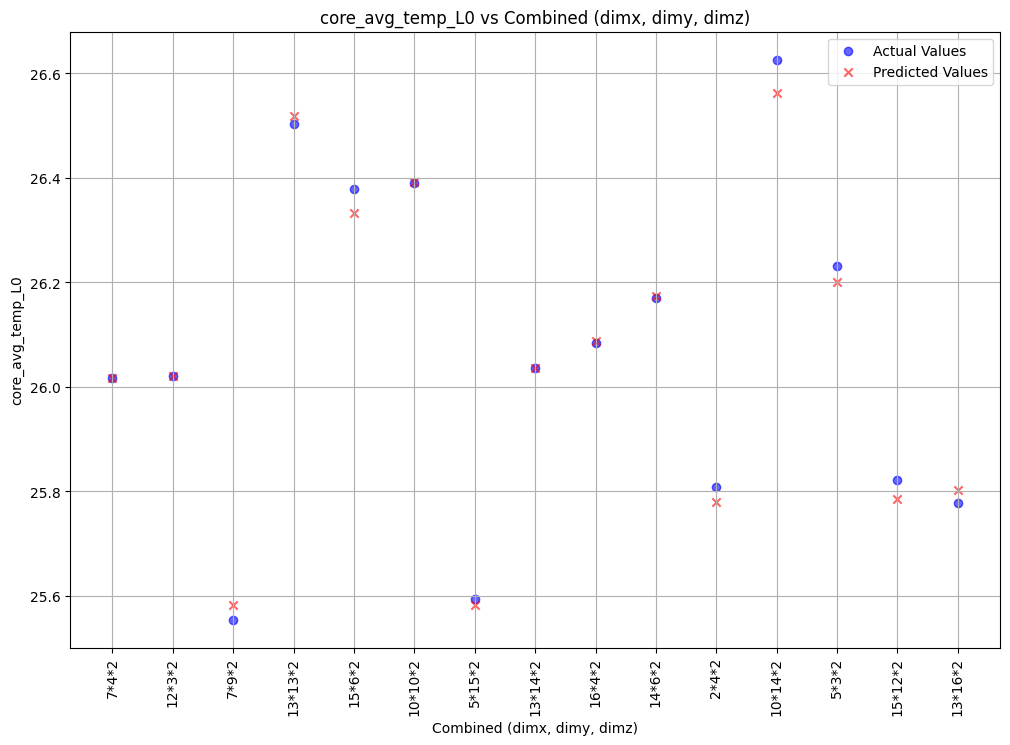

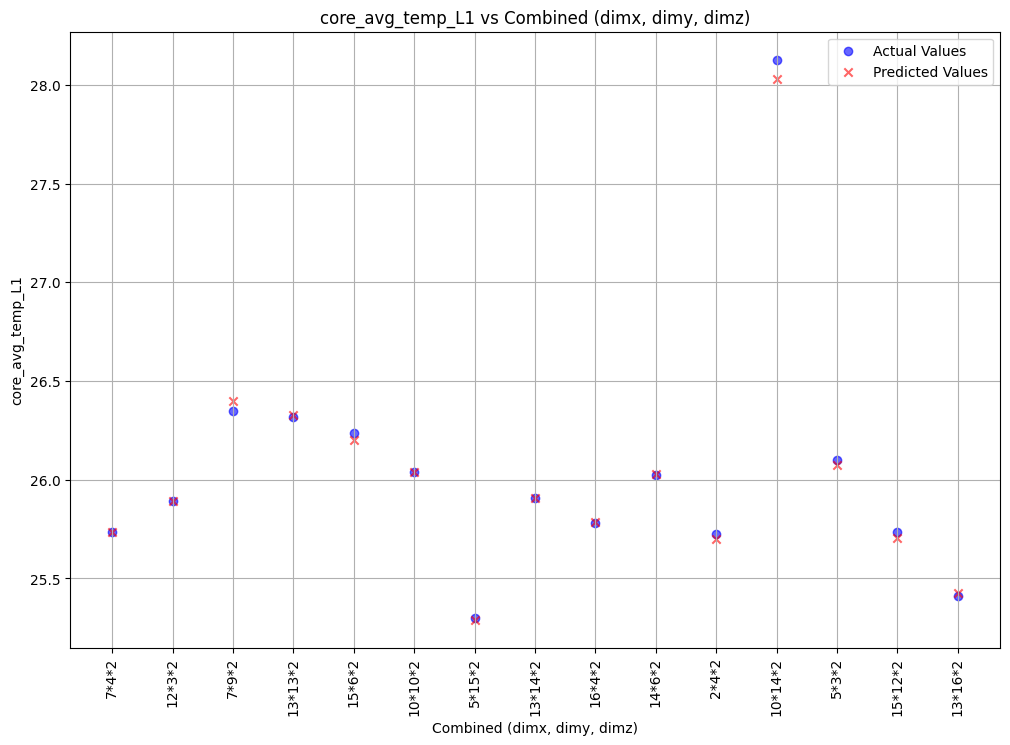

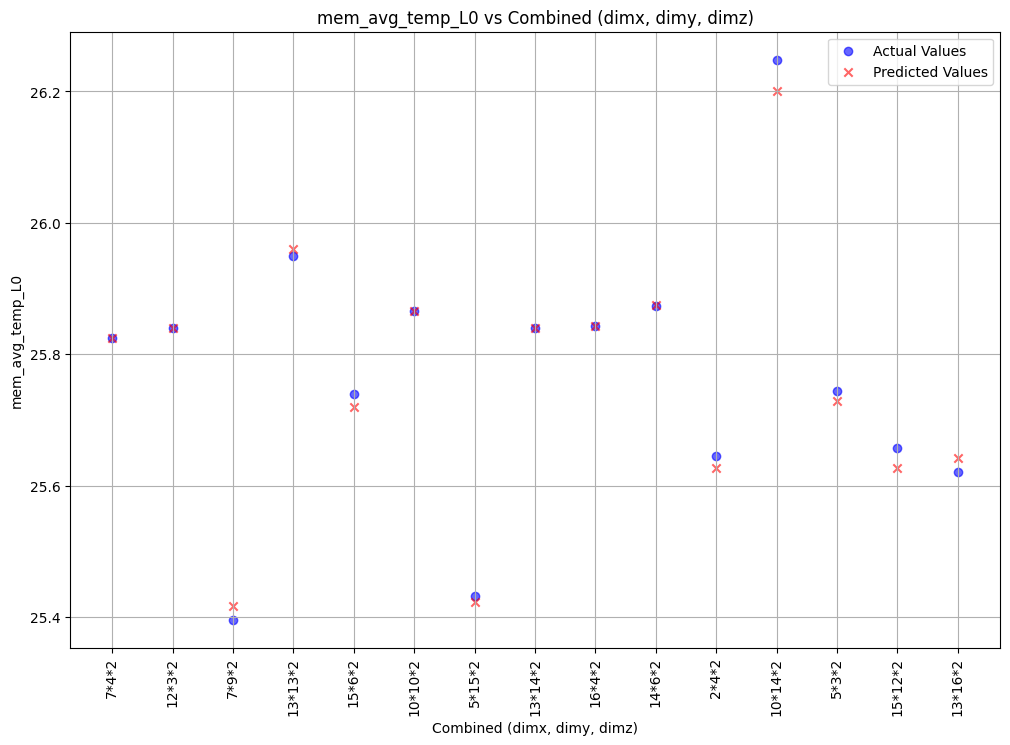

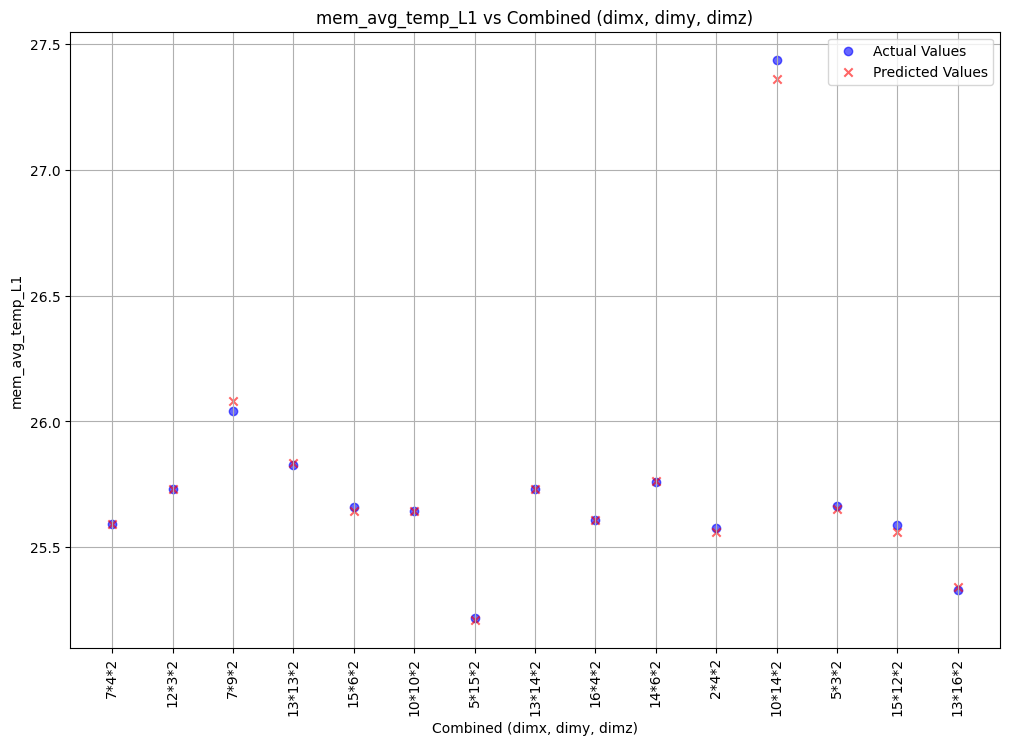

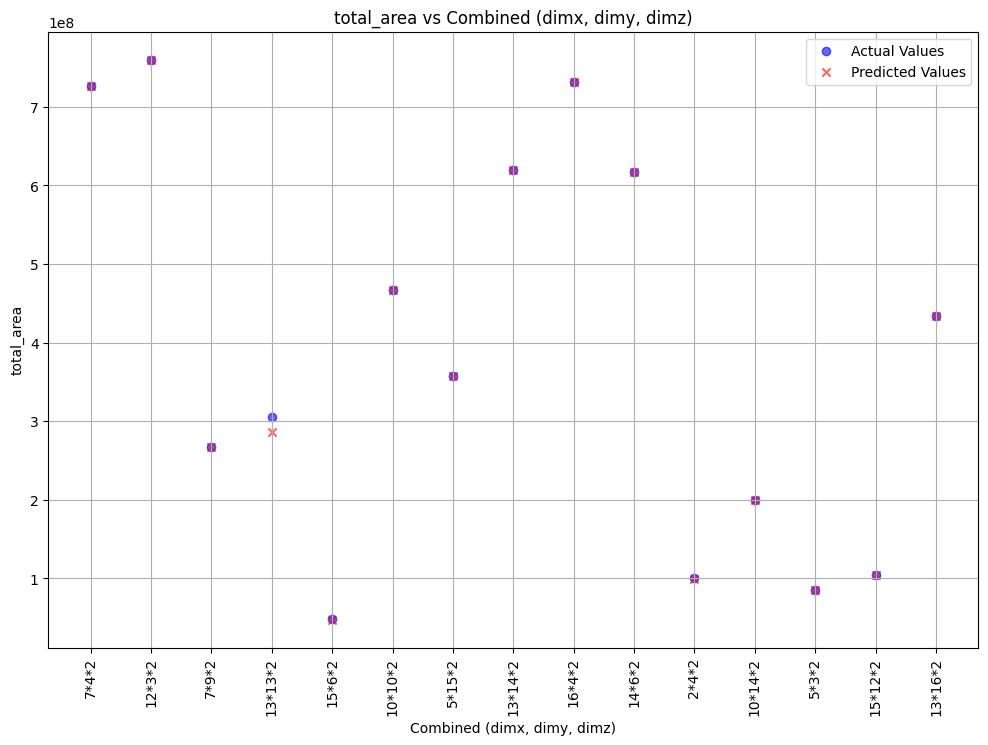

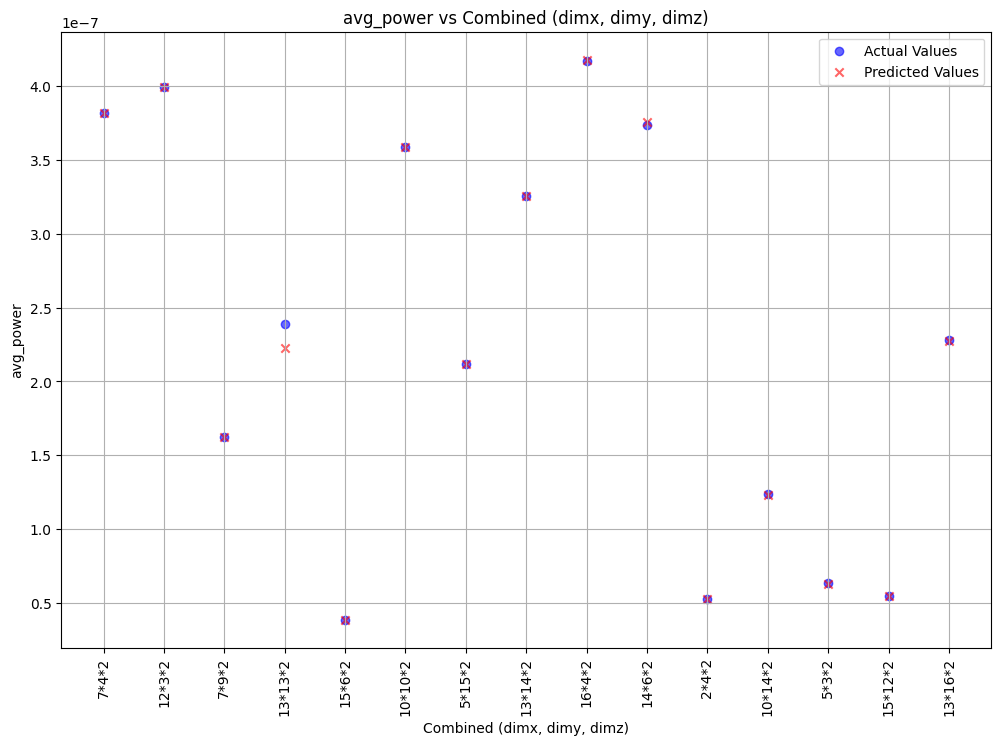

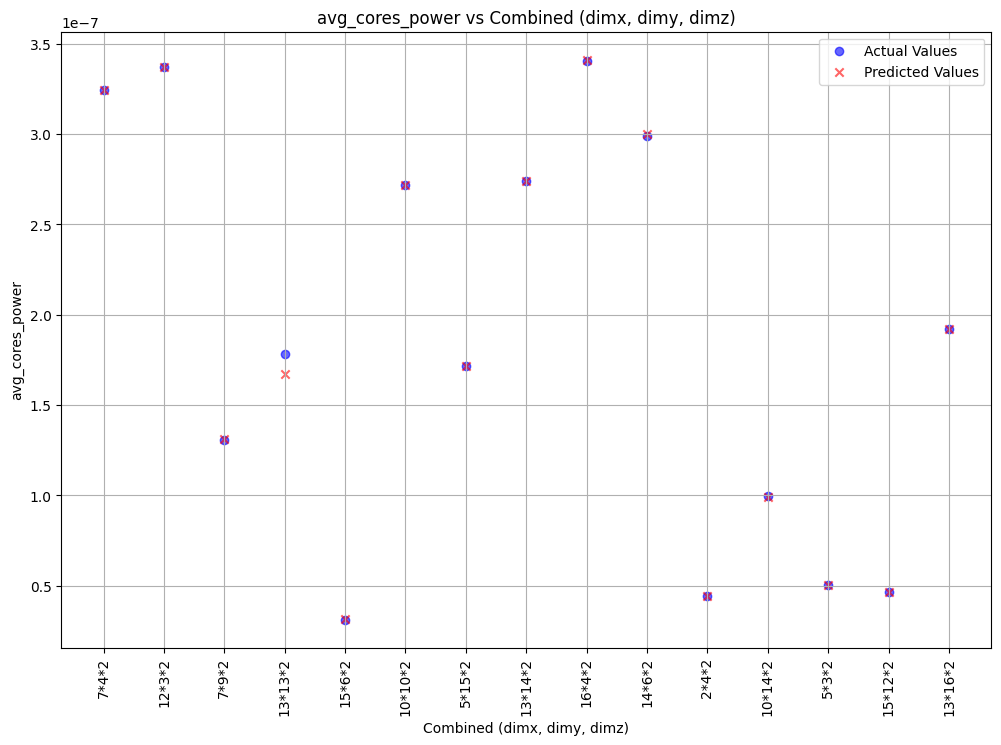

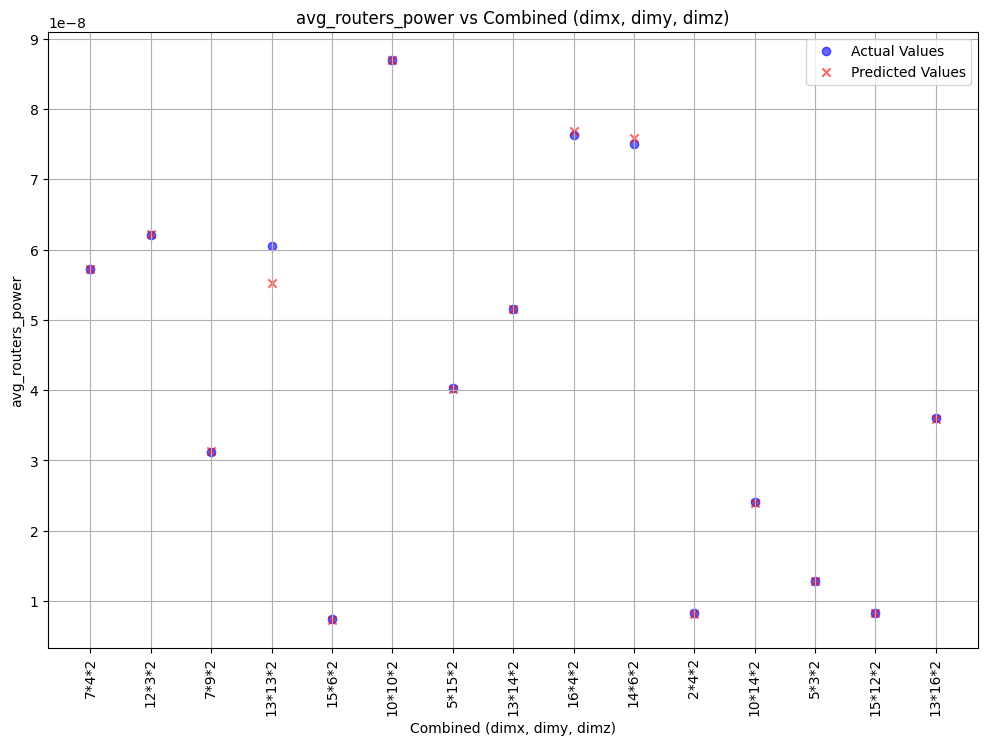

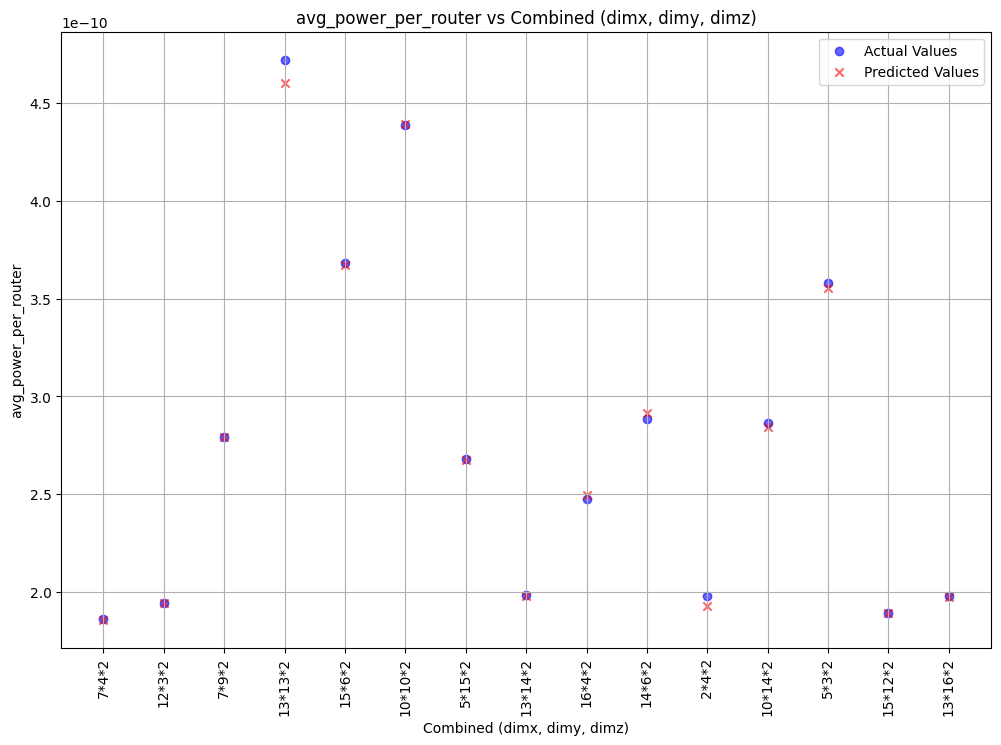

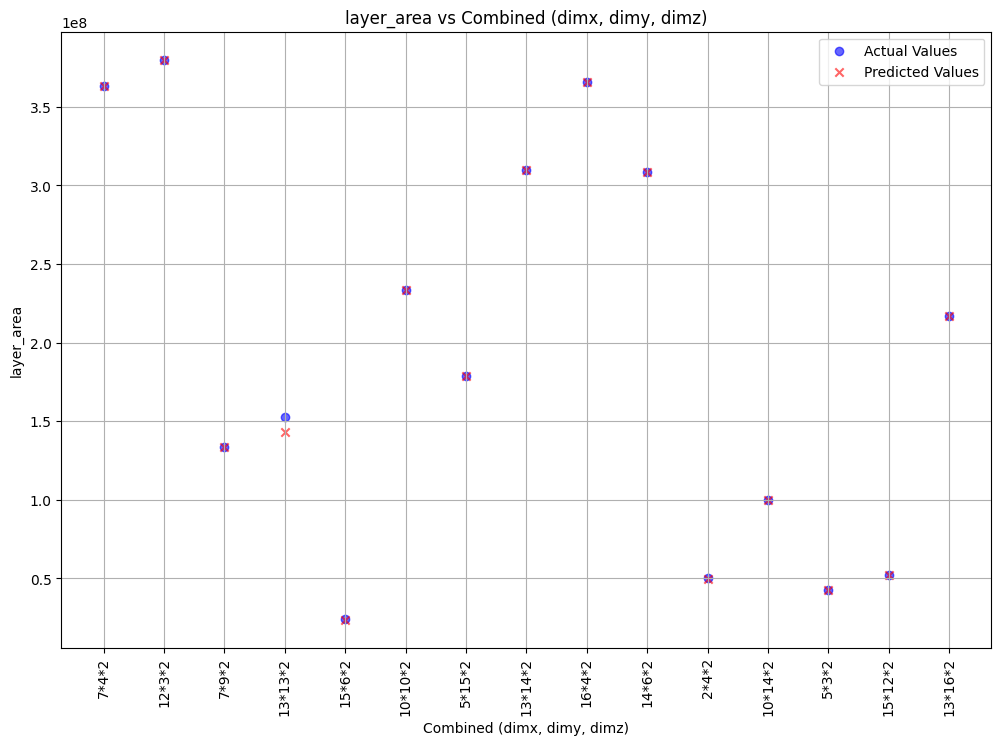

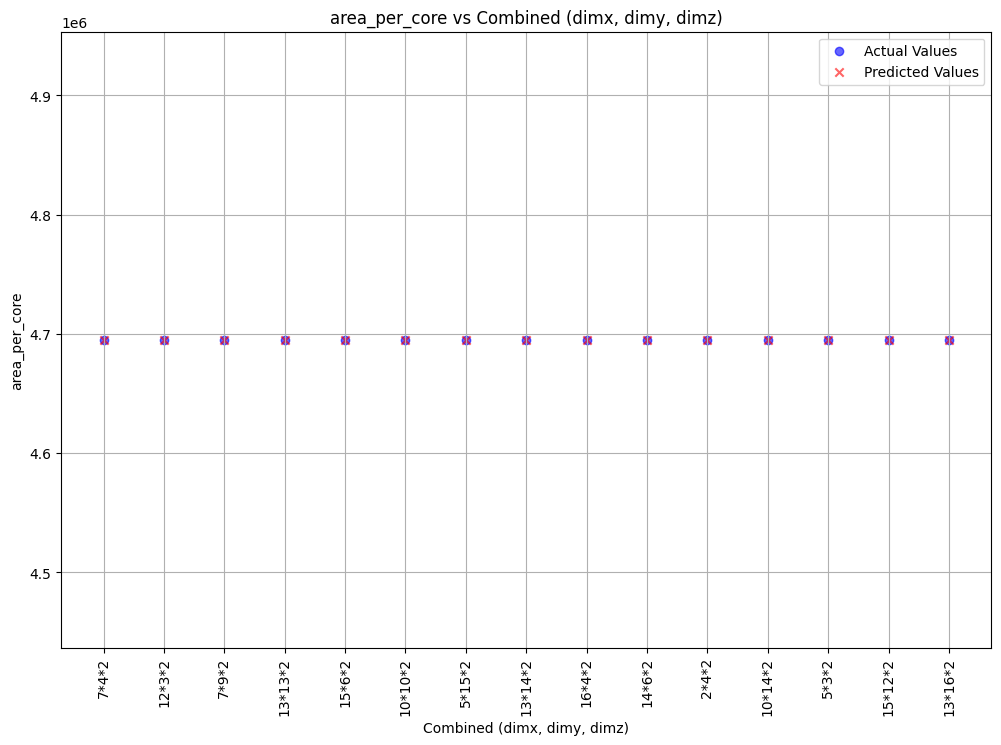

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_actual_vs_predicted_combination_v7(model, X_test_scaled, y_test_scaled, target_columns, scaler_y, df, X_test):
    """
    This function plots actual vs predicted values for each target variable
    for the specific (dimx, dimy, dimz) combinations: 2*2*2, 3*3*2, ..., 16*16*2.

    Parameters:
    - model: Trained model (e.g., tree_model)
    - X_test_scaled: Scaled test features
    - y_test_scaled: Scaled test target values
    - target_columns: List of target column names
    - scaler_y: Fitted StandardScaler for target variables
    - df: Original DataFrame with 'dimx', 'dimy', 'dimz' columns
    - X_test: The unscaled test features

    Returns:
    - None
    """
    # Filter the dataframe for constant input values
    filtered_df = df[(df['buffer_size'] == 8) &
                     (df['routing_type'] == 'fullyadaptive') &
                     (df['injection_rate'] == 0.07) &
                     (df['packet_size_min'] == 4) &
                     (df['packet_size_max'] == 8) &
                     (df['selection_strategy'] == 'thermal') &
                     (df['traffic_type'] == 'random')]

    # Define the valid combinations (dimx, dimy, dimz) for 2*2*2, 3*3*2, ..., 16*16*2
    valid_combinations = [(x, y, 2) for x in range(2, 17) for y in range(2, 17)]  # x and y range from 2 to 16, and dimz is always 2

    # Create a list of valid combination strings in the format "x*y*2"
    valid_combinations_str = [f"{x}*{y}*2" for x in range(2, 17) for y in range(2, 17)]

    # Filter the dataframe for only the valid (dimx, dimy, dimz) combinations
    filtered_test_data = filtered_df[filtered_df.apply(lambda row: f"{row['dimx']}*{row['dimy']}*{row['dimz']}" in valid_combinations_str, axis=1)]

    # Now get the corresponding rows from X_test_scaled for the valid combinations
    valid_indices = filtered_test_data.index
    X_test_filtered = X_test_scaled[valid_indices]
    y_test_filtered = y_test_scaled[valid_indices]

    # Inverse transform the scaled predictions and actual values
    y_test_inv = scaler_y.inverse_transform(y_test_filtered)
    y_pred_inv = scaler_y.inverse_transform(model.predict(X_test_filtered))

    # Extract the dimensions (dimx, dimy, dimz) corresponding to the test set
    dim_combined = filtered_test_data[['dimx', 'dimy', 'dimz']].apply(lambda row: f"{row['dimx']}*{row['dimy']}*{row['dimz']}", axis=1)

    # Only include the first 15 points (2*2*2, 3*3*2, ..., 16*16*2)
    dim_combined = [comb for comb in dim_combined if comb in valid_combinations_str][:15]
    y_test_inv = y_test_inv[:15, :]
    y_pred_inv = y_pred_inv[:15, :]

    # Plot for each target variable
    for i, target in enumerate(target_columns):
        actual = y_test_inv[:, i]
        predicted = y_pred_inv[:, i]

        # Create the plot
        plt.figure(figsize=(12, 8))

        # Plot actual values
        plt.scatter(dim_combined, actual, label='Actual Values', color='blue', alpha=0.6)

        # Plot predicted values
        plt.scatter(dim_combined, predicted, label='Predicted Values', color='red', alpha=0.6, marker='x')

        # Titles and labels
        plt.title(f'{target} vs Combined (dimx, dimy, dimz)')
        plt.xlabel('Combined (dimx, dimy, dimz)')
        plt.ylabel(f'{target}')
        plt.legend()
        plt.grid(True)

        # Set the X-axis ticks to show only the valid combinations
        plt.xticks(ticks=np.arange(15), labels=dim_combined, rotation=90)  # Adjust the x-ticks to match the labels

        # Show the plot
        plt.show()






plot_actual_vs_predicted_combination_v7(tree_model, X_test_scaled, y_test_scaled, target_columns, scaler_y, df, X_test)


In [ ]:
# Example new input data as a DataFrame (ensure it matches the structure of the features)
new_data = pd.DataFrame({
    'dimx': [3],
    'dimy': [10],
    'dimz': [2],
    'buffer_size': [8],
    'packet_size_min': [4],
    'packet_size_max': [8],
    'routing_type_fullyadaptive': [1],    # Make sure to align with the encoded columns
    'selection_strategy_thermal': [1],
    'traffic_type_random': [1],
    'injection_rate': [0.06]
})

# Align new data columns to match X_train (fill missing columns with 0)
new_data_encoded = new_data.reindex(columns=X.columns, fill_value=0)

# Scale new data using the scaler fitted on training data
new_data_scaled = scaler_X.transform(new_data_encoded)

# Predict using the trained model
new_pred_scaled = tree_model.predict(new_data_scaled)

# Inverse transform the prediction to original scale
new_pred_orig = scaler_y.inverse_transform(new_pred_scaled)

# Display the prediction
print("Decision Tree Prediction on New Data:")
print(pd.DataFrame(new_pred_orig, columns=target_columns))


Decision Tree Prediction on New Data:
   steady_state_temp_L0  steady_state_temp_L1  router_avg_temp_L0  \
0             62.982429             62.348664            25.62533   

   router_avg_temp_L1  core_avg_temp_L0  core_avg_temp_L1  mem_avg_temp_L0  \
0            26.29701         25.490957         25.827063        25.392663   

   mem_avg_temp_L1   total_area     avg_power  avg_cores_power  \
0        25.652403  142533000.0  7.480820e-08     6.324560e-08   

   avg_routers_power  avg_power_per_router  layer_area  area_per_core  
0       1.156260e-08          1.927110e-10  71266400.0      4695230.0  


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train Random Forest model
forest_model = RandomForestRegressor()
forest_model.fit(X_train_scaled, y_train_scaled)

# Evaluate the model
y_pred = forest_model.predict(X_test_scaled)
print("Random Forest Regression Performance:")
print("MSE:", mean_squared_error(y_test_scaled, y_pred))
print("MAE:", mean_absolute_error(y_test_scaled, y_pred))
print("R²:", r2_score(y_test_scaled, y_pred))



Random Forest Regression Performance:
MSE: 0.002628351901104433
MAE: 0.02044430583387629
R²: 0.9974171596985245


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train Random Forest model
forest_model = RandomForestRegressor()
forest_model.fit(X_train_scaled, y_train_scaled)

# Evaluate the model for each target variable separately
print("Random Forest Regression Performance (per target variable):")
for i, target in enumerate(target_columns):
    y_test_target = y_test_scaled[:, i]  # Get actual values for target i
    y_pred_target = forest_model.predict(X_test_scaled)[:, i]  # Predict and get values for target i

    # Calculate performance metrics
    mse = mean_squared_error(y_test_target, y_pred_target)
    mae = mean_absolute_error(y_test_target, y_pred_target)
    r2 = r2_score(y_test_target, y_pred_target)

    print(f"\nTarget: {target}")
    print("MSE:", mse)
    print("MAE:", mae)
    print("R²:", r2)


Random Forest Regression Performance (per target variable):

Target: steady_state_temp_L0
MSE: 0.0012986702883902316
MAE: 0.015666738988795594
R²: 0.9986769091448892

Target: steady_state_temp_L1
MSE: 0.0012681328294415052
MAE: 0.015481845722410289
R²: 0.9987085658809708

Target: router_avg_temp_L0
MSE: 0.005151920568468101
MAE: 0.03815966076659471
R²: 0.9949879341400352

Target: router_avg_temp_L1
MSE: 0.0020425617457340405
MAE: 0.02165111275414334
R²: 0.9980196941173459

Target: core_avg_temp_L0
MSE: 0.007617986639920851
MAE: 0.046159102389813876
R²: 0.992507449698567

Target: core_avg_temp_L1
MSE: 0.0030086075000521103
MAE: 0.027598532634381237
R²: 0.9970641978964988

Target: mem_avg_temp_L0
MSE: 0.0054964530616374505
MAE: 0.041327855758956575
R²: 0.9947893045855856

Target: mem_avg_temp_L1
MSE: 0.0017644612662520462
MAE: 0.020068004622723797
R²: 0.9982938236221841

Target: total_area
MSE: 0.0001103977749090044
MAE: 0.003061582261009441
R²: 0.9998916017918411

Target: avg_power
MSE:

In [ ]:
# Example new input data as a DataFrame (ensure it matches the structure of the features)
new_data = pd.DataFrame({
    'dimx': [14],
    'dimy': [11],
    'dimz': [2],
    'buffer_size': [10],
    'packet_size_min': [4],
    'packet_size_max': [8],
    'routing_type_oe_3d': [1],    # Make sure to align with the encoded columns
    'selection_strategy_thermal': [1],
    'traffic_type_random': [1],
    'injection_rate': [0.05]
})

# Align new data columns to match X_train (fill missing columns with 0)
new_data_encoded = new_data.reindex(columns=X.columns, fill_value=0)

# Scale new data using the scaler fitted on training data
new_data_scaled = scaler_X.transform(new_data_encoded)

# Predict using the trained model
new_pred_scaled = forest_model.predict(new_data_scaled)

# Inverse transform the prediction to original scale
new_pred_orig = scaler_y.inverse_transform(new_pred_scaled)

# Display the prediction
print("Random Forest Prediction on New Data:")
print(pd.DataFrame(new_pred_orig, columns=target_columns))

Decision Tree Prediction on New Data:
   steady_state_temp_L0  steady_state_temp_L1  router_avg_temp_L0  \
0            129.196929             128.07145           26.887611   

   router_avg_temp_L1  core_avg_temp_L0  core_avg_temp_L1  mem_avg_temp_L0  \
0           26.649305         26.156412         26.011081        25.869494   

   mem_avg_temp_L1   total_area     avg_power  avg_cores_power  \
0        25.756921  733879670.0  4.394125e-07     3.506439e-07   

   avg_routers_power  avg_power_per_router   layer_area  area_per_core  
0       8.876860e-08          2.882099e-10  366939830.0      4695230.0  


In [ ]:
from sklearn.svm import SVR

# Train and evaluate SVR model for each target variable
svr_models = {}
for i, target in enumerate(target_columns):
    svr_model = SVR()
    svr_model.fit(X_train_scaled, y_train_scaled[:, i])
    svr_models[target] = svr_model

    # Evaluate the model
    y_pred = svr_model.predict(X_test_scaled)
    print(f"\nSVR Performance for {target}:")
    print("MSE:", mean_squared_error(y_test_scaled[:, i], y_pred))
    print("MAE:", mean_absolute_error(y_test_scaled[:, i], y_pred))
    print("R²:", r2_score(y_test_scaled[:, i], y_pred))



SVR Performance for steady_state_temp_L0:
MSE: 0.06111285058031918
MAE: 0.12410324234368612
R²: 0.9377379659368326

SVR Performance for steady_state_temp_L1:
MSE: 0.062077166694492224
MAE: 0.12437903950464707
R²: 0.9367821972425096

SVR Performance for router_avg_temp_L0:
MSE: 0.5593603831053655
MAE: 0.22504010461804833
R²: 0.455824086897191

SVR Performance for router_avg_temp_L1:
MSE: 0.366576980386233
MAE: 0.24365284566137663
R²: 0.644596031321667

SVR Performance for core_avg_temp_L0:
MSE: 0.5307229486845336
MAE: 0.26129965138240785
R²: 0.47801583579765206

SVR Performance for mem_avg_temp_L0:
MSE: 1.0968568647777182
MAE: 0.3303255194813718
R²: -0.0398318645631468

SVR Performance for mem_avg_temp_L1:
MSE: 0.4087083969840603
MAE: 0.27240725329690263
R²: 0.6047923376462434

SVR Performance for total_area:
MSE: 0.004061353085625716
MAE: 0.056722227135922156
R²: 0.9960122076958052

SVR Performance for avg_power:
MSE: 0.002706788804631547
MAE: 0.042193629239995166
R²: 0.99733076093984

In [ ]:
# Example new input data as a DataFrame (ensure it matches the structure of the features)
new_data = pd.DataFrame({
    'dimx': [3],
    'dimy': [10],
    'dimz': [2],
    'buffer_size': [8],
    'packet_size_min': [4],
    'packet_size_max': [8],
    'routing_type_fullyadaptive': [1],    # Make sure to align with the encoded columns
    'selection_strategy_thermal': [1],
    'traffic_type_random': [1],
    'injection_rate': [0.06]
})

# Align new data columns to match X_train (fill missing columns with 0)
new_data_encoded = new_data.reindex(columns=X.columns, fill_value=0)

# Scale new data using the scaler fitted on training data
new_data_scaled = scaler_X.transform(new_data_encoded)

# Predict for each target variable using the trained SVR models and inverse scale the predictions
# Predict for each target variable using the trained SVR models and inverse scale the predictions
predictions = []
for i, target in enumerate(target_columns):
    new_pred_scaled = svr_models[target].predict(new_data_scaled)

    # Create an empty array for inverse transformation with correct shape
    placeholder = np.zeros((1, len(target_columns)))
    placeholder[0, i] = new_pred_scaled  # Place the prediction in the correct column

    # Inverse transform only the prediction for the current target
    new_pred_orig = scaler_y.inverse_transform(placeholder)
    predictions.append(new_pred_orig[0, i])

# Display predictions in a readable format
predicted_df = pd.DataFrame([predictions], columns=target_columns)
print("\nSVR Predictions on New Data:")
print(predicted_df)



SVR Predictions on New Data:
   steady_state_temp_L0  steady_state_temp_L1  router_avg_temp_L0  \
0             68.525273             67.738322           25.803271   

   router_avg_temp_L1  core_avg_temp_L0  core_avg_temp_L1  mem_avg_temp_L0  \
0            27.33404         25.654775         25.979717        25.505627   

   mem_avg_temp_L1    total_area     avg_power  avg_cores_power  \
0        25.762063  1.441650e+08  6.859249e-08     6.242980e-08   

   avg_routers_power  avg_power_per_router    layer_area  area_per_core  
0       8.874998e-09          1.834617e-10  7.206641e+07      4695230.0  


<ipython-input-24-f98deb7d2c91>:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  placeholder[0, i] = new_pred_scaled  # Place the prediction in the correct column
<ipython-input-24-f98deb7d2c91>:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  placeholder[0, i] = new_pred_scaled  # Place the prediction in the correct column
<ipython-input-24-f98deb7d2c91>:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  placeholder[0, i] = new_pred_scaled  # Place the prediction

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train an AdaBoost model for each target variable and store in a dictionary
ada_models = {}
for target in target_columns:
    ada_model = AdaBoostRegressor()
    ada_model.fit(X_train_scaled, y_train_scaled[:, target_columns.index(target)])  # Train on the scaled training data
    ada_models[target] = ada_model

# Evaluate the model for each target
for target in target_columns:
    y_pred = ada_models[target].predict(X_test_scaled)
    print(f"AdaBoost Performance for {target}:")
    print("MSE:", mean_squared_error(y_test_scaled[:, target_columns.index(target)], y_pred))
    print("MAE:", mean_absolute_error(y_test_scaled[:, target_columns.index(target)], y_pred))
    print("R²:", r2_score(y_test_scaled[:, target_columns.index(target)], y_pred))
    print()


AdaBoost Performance for steady_state_temp_L0:
MSE: 0.19061570788435758
MAE: 0.36304910482621516
R²: 0.8057998999462043

AdaBoost Performance for steady_state_temp_L1:
MSE: 0.19387194572350708
MAE: 0.366057436105078
R²: 0.802565756822033

AdaBoost Performance for router_avg_temp_L0:
MSE: 0.21785532697389312
MAE: 0.3665211093794013
R²: 0.7880586021802728

AdaBoost Performance for router_avg_temp_L1:
MSE: 0.21308523643050964
MAE: 0.33665815770793023
R²: 0.7934094535495056

AdaBoost Performance for core_avg_temp_L0:
MSE: 0.44357566589173236
MAE: 0.4784244425479137
R²: 0.5637281677852883

AdaBoost Performance for core_avg_temp_L1:
MSE: 0.28287603200738504
MAE: 0.43253907382773116
R²: 0.7239692948372354

AdaBoost Performance for mem_avg_temp_L0:
MSE: 0.22913678775798493
MAE: 0.36968361181798765
R²: 0.7827759109638426

AdaBoost Performance for mem_avg_temp_L1:
MSE: 0.15758614574206148
MAE: 0.28570736496391547
R²: 0.8476193473448812

AdaBoost Performance for total_area:
MSE: 0.031076975394847

In [ ]:
# Example new input data as a DataFrame (ensure it matches the structure of the features)
new_data = pd.DataFrame({
    'dimx': [14],
    'dimy': [11],
    'dimz': [2],
    'buffer_size': [10],
    'packet_size_min': [4],
    'packet_size_max': [8],
    'routing_type_oe_3d': [1],  # Ensure to match the encoded columns
    'selection_strategy_thermal': [1],
    'traffic_type_random': [1],
    'injection_rate': [0.05]
})

# Align new data columns to match X_train (fill missing columns with 0)
new_data_encoded = new_data.reindex(columns=X.columns, fill_value=0)

# Scale new data using the scaler fitted on training data
new_data_scaled = scaler_X.transform(new_data_encoded)

# Predict for each target variable
all_preds_scaled = []
for target in target_columns:
    # Predict for all target variables (this returns an array of predicted values for the current input)
    new_pred_scaled = ada_models[target].predict(new_data_scaled)
    all_preds_scaled.append(new_pred_scaled)

# Convert all predictions into a single 2D array (15 target values for each prediction)
all_preds_scaled = np.array(all_preds_scaled).T  # Transpose to get shape (1, 15)

# Inverse transform the entire array of predictions at once
new_preds_orig = scaler_y.inverse_transform(all_preds_scaled)

# Display predictions in a readable format
predicted_df = pd.DataFrame(new_preds_orig, columns=target_columns)
print("\nAdaBoost Predictions on New Data:")
print(predicted_df)





AdaBoost Predictions on New Data:
   steady_state_temp_L0  steady_state_temp_L1  router_avg_temp_L0  \
0            137.891525            138.231127           26.710091   

   router_avg_temp_L1  core_avg_temp_L0  core_avg_temp_L1  mem_avg_temp_L0  \
0           26.271688         26.082944         25.822854        25.790274   

   mem_avg_temp_L1    total_area     avg_power  avg_cores_power  \
0        25.722382  7.391477e+08  4.935511e-07     3.931287e-07   

   avg_routers_power  avg_power_per_router    layer_area  area_per_core  
0       1.047472e-07          3.095629e-10  3.616603e+08      4695230.0  


In [3]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Initialize an empty dictionary to store models for each target
boost_models = {}

# Train an AdaBoost model for each target variable
for i, target in enumerate(target_columns):
    boost_model = AdaBoostRegressor(estimator=DecisionTreeRegressor(), n_estimators=50, random_state=42)
    boost_model.fit(X_train_scaled, y_train_scaled[:, i])  # Fit each target column individually
    boost_models[target] = boost_model

    # Evaluate the model for the current target
    y_pred = boost_model.predict(X_test_scaled)
    print(f"AdaBoost Regression Performance for {target}:")
    print("MSE:", mean_squared_error(y_test_scaled[:, i], y_pred))
    print("MAE:", mean_absolute_error(y_test_scaled[:, i], y_pred))
    print("R²:", r2_score(y_test_scaled[:, i], y_pred))
    print("-" * 30)



AdaBoost Regression Performance for steady_state_temp_L0:
MSE: 0.0010597745330302962
MAE: 0.012507024343578864
R²: 0.9988966135354076
------------------------------
AdaBoost Regression Performance for steady_state_temp_L1:
MSE: 0.0011417523955736279
MAE: 0.012705372921638399
R²: 0.9988117188204748
------------------------------
AdaBoost Regression Performance for router_avg_temp_L0:
MSE: 0.004746539656741087
MAE: 0.031283265519284696
R²: 0.9952391300456146
------------------------------
AdaBoost Regression Performance for router_avg_temp_L1:
MSE: 0.0019619106350501556
MAE: 0.019296705285086677
R²: 0.9981288650087657
------------------------------
AdaBoost Regression Performance for core_avg_temp_L0:
MSE: 0.007712879178335151
MAE: 0.04147808107666831
R²: 0.9921706480631405
------------------------------
AdaBoost Regression Performance for core_avg_temp_L1:
MSE: 0.0033926265175054323
MAE: 0.026744338631084965
R²: 0.9966483226443912
------------------------------
AdaBoost Regression Perfo

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Save plots and label them for LaTeX insertion
for i, target in enumerate(target_columns):
    y_pred_scaled = boost_models[target].predict(X_test_scaled).reshape(-1, 1)

    # Placeholder for inverse transformation
    y_pred_placeholder = np.zeros_like(y_test_scaled)
    y_pred_placeholder[:, i] = y_pred_scaled[:, 0]

    # Inverse transform to original scale
    y_pred = scaler_y.inverse_transform(y_pred_placeholder)[:, i]
    y_true = scaler_y.inverse_transform(y_test_scaled)[:, i]

    # Create scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.5, color="blue", label="Predictions")
    plt.plot([min(y_true.min(), y_pred.min()), max(y_true.max(), y_pred.max())],
             [min(y_true.min(), y_pred.min()), max(y_true.max(), y_pred.max())],
             'r--', label="Ideal Fit")  # Red dashed line

    plt.xlabel("Actual values by PAT Noxim")
    plt.ylabel("Predicted values by AdaBoost with Decision Tree")
    plt.title(f"Actual vs Predicted for {target}")
    plt.legend()

    # Save the plot with a unique name for each target
    filename = f"actual_vs_predicted_{target}.png"
    plt.savefig(filename)
    plt.close()


In [ ]:
# Example new input data as a DataFrame (ensure it matches the structure of the features)
new_data = pd.DataFrame({
    'dimx': [14],
    'dimy': [11],
    'dimz': [2],
    'buffer_size': [10],
    'packet_size_min': [4],
    'packet_size_max': [8],
    'routing_type_oe_3d': [1],  # Make sure to align with the encoded columns
    'selection_strategy_thermal': [1],
    'traffic_type_random': [1],
    'injection_rate': [0.05]
})

# Align new data columns to match X_train (fill missing columns with 0 if needed)
new_data_encoded = new_data.reindex(columns=X.columns, fill_value=0)

# Scale the new data using the scaler fitted on the training data
new_data_scaled = scaler_X.transform(new_data_encoded)

# Initialize an empty list to store predictions for each target
predictions = []

# Predict for each target variable using the trained AdaBoost model
new_pred_scaled = []
for target in target_columns:
    # Predict using the trained AdaBoost model for the current target
    new_pred_scaled.append(boost_models[target].predict(new_data_scaled)[0])  # Collect all predictions

# Inverse transform the predictions to original scale
new_pred_orig = scaler_y.inverse_transform(np.array(new_pred_scaled).reshape(1, -1))

# Display predictions in a readable format
predicted_df = pd.DataFrame(new_pred_orig, columns=target_columns)
print("\nAdaBoost Predictions on New Data:")
print(predicted_df)



AdaBoost Predictions on New Data:
   steady_state_temp_L0  steady_state_temp_L1  router_avg_temp_L0  \
0            129.049083            127.923777           26.892316   

   router_avg_temp_L1  core_avg_temp_L0  core_avg_temp_L1  mem_avg_temp_L0  \
0           26.652279         26.157563          26.01193        25.869781   

   mem_avg_temp_L1   total_area     avg_power  avg_cores_power  \
0        25.757031  733902000.0  4.397790e-07     3.508380e-07   

   avg_routers_power  avg_power_per_router   layer_area  area_per_core  
0       8.894070e-08          2.890100e-10  366951000.0      4695230.0  


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize an empty dictionary to store models for each target
knn_models = {}

# Train a KNN model for each target variable
for i, target in enumerate(target_columns):
    knn_model = KNeighborsRegressor(n_neighbors=5)  # Set the number of neighbors as needed
    knn_model.fit(X_train_scaled, y_train_scaled[:, i])  # Fit each target column individually
    knn_models[target] = knn_model

    # Evaluate the model for the current target
    y_pred = knn_model.predict(X_test_scaled)
    print(f"KNN Regression Performance for {target}:")
    print("MSE:", mean_squared_error(y_test_scaled[:, i], y_pred))
    print("MAE:", mean_absolute_error(y_test_scaled[:, i], y_pred))
    print("R²:", r2_score(y_test_scaled[:, i], y_pred))
    print("-" * 30)


KNN Regression Performance for steady_state_temp_L0:
MSE: 0.03800718407397424
MAE: 0.11712329118149603
R²: 0.9604287410600592
------------------------------
KNN Regression Performance for steady_state_temp_L1:
MSE: 0.03833627501471032
MAE: 0.11754699197638803
R²: 0.9601014420730043
------------------------------
KNN Regression Performance for router_avg_temp_L0:
MSE: 0.2341465869491501
MAE: 0.17966994162487815
R²: 0.7651465001151014
------------------------------
KNN Regression Performance for router_avg_temp_L1:
MSE: 0.2299657214564903
MAE: 0.17860026099705598
R²: 0.7806745625849254
------------------------------
KNN Regression Performance for core_avg_temp_L0:
MSE: 0.22829185059454712
MAE: 0.2017322330348899
R²: 0.7682606972967673
------------------------------
KNN Regression Performance for core_avg_temp_L1:
MSE: 0.21914368891346497
MAE: 0.2000348099158454
R²: 0.7835013857358157
------------------------------
KNN Regression Performance for mem_avg_temp_L0:
MSE: 0.4310645345328565
MA

In [ ]:
# Example new input data as a DataFrame (ensure it matches the structure of the features)
new_data = pd.DataFrame({
    'dimx': [14],
    'dimy': [11],
    'dimz': [2],
    'buffer_size': [10],
    'packet_size_min': [4],
    'packet_size_max': [8],
    'routing_type_oe_3d': [1],  # Make sure to align with the encoded columns
    'selection_strategy_thermal': [1],
    'traffic_type_random': [1],
    'injection_rate': [0.05]
})

# Align new data columns to match X_train (fill missing columns with 0 if needed)
new_data_encoded = new_data.reindex(columns=X.columns, fill_value=0)

# Scale the new data using the scaler fitted on the training data
new_data_scaled = scaler_X.transform(new_data_encoded)

# Initialize an empty list to store predictions for each target
predictions = []

# Predict for each target variable using the trained KNN model
new_pred_scaled = []
for target in target_columns:
    # Predict using the trained KNN model for the current target
    new_pred_scaled.append(knn_models[target].predict(new_data_scaled)[0])  # Collect all predictions

# Inverse transform the predictions to original scale
new_pred_orig = scaler_y.inverse_transform(np.array(new_pred_scaled).reshape(1, -1))

# Display predictions in a readable format
predicted_df = pd.DataFrame(new_pred_orig, columns=target_columns)
print("\nKNN Predictions on New Data:")
print(predicted_df)


KNN Predictions on New Data:
   steady_state_temp_L0  steady_state_temp_L1  router_avg_temp_L0  \
0            133.836033            132.680066           26.836744   

   router_avg_temp_L1  core_avg_temp_L0  core_avg_temp_L1  mem_avg_temp_L0  \
0           26.602323         26.147821         26.003347        25.867479   

   mem_avg_temp_L1   total_area     avg_power  avg_cores_power  \
0        25.755132  749151600.0  4.443004e-07     3.557670e-07   

   avg_routers_power  avg_power_per_router   layer_area  area_per_core  
0       8.853344e-08          2.817042e-10  374575800.0      4695230.0  
